<a id="top"></a>
# **3.1 Nonlinear bond - softening and hardening**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551816)&nbsp; part 1

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

By saying that we want to capture the _material behavior_ we mean
that we realistically describe the **constitutive relation** between the strain and stress which is **valid for
any material point** of the considered volume. With the focus on a one-dimensional interface between two material
components we can reduce this task to the relation between bond stress and slip.
In Tour 2, we assumed the constitutive bond-slip relation constant. However, as we have learned
in trip [2.1 Pull-out of elastic fiber from rigid matrix](../pull_out/2_1_1_PO_observation.ipynb)
this stick-slip interface behavior cannot realistically describe the experimentally measured
response of steel-concrete pull-out with varied length of the bond length $L_b$.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

To improve the quality of the model, in this notebook we introduce and investigate more complex shapes of bond slip laws and their effect on the observed pullout response. This extension will enable a more **realistic 
prediction of a wide range of pull-out and crack bridge tests**, including 
steel rebars, carbon textile fabrics or carbon fiber reinforced polymer (CFRP) sheets.
Using the models, we will perform automated studies of the pull-out response that can demonstrate the different phenomenology behind hardening and softening constitutive behavior.
These studies indicate how validated models can support the definition of engineering design rules. 

To proceed in small steps we consider two shapes of constant bond-slip law, referred to as **bond-hardening and bond softening**.

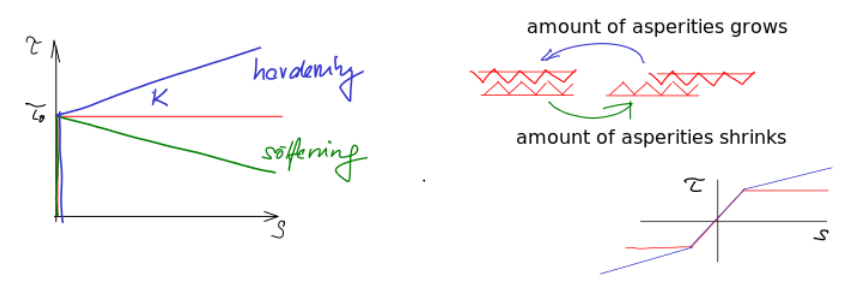

The increasing/hardening or decreasing/softening trend of the bond-slip law in the second branch introduces the question, what kind of **material structure** within the bond zone can induce such type of behavior. An example of an idealized bond system leading to hardening or softening can be provided using a rough surface  with an increasing or decreasing number of asperities. A more detailed classification of the bond systems will be shown in Tour 3 which provides a more physically based description of the debonding process. The question studied in this notebook is **what is the qualitative effect of the second bond-slip slope on the pull-out response.**

# **Numerical support necessary**

To solve a pullout problem for a generally nonlinear bond-slip law, we have to solve
the initial boundary value problem numerically. In this notebook, we will use a finite-element code
implemented within the BMCS tool to study the behavior for two examples of qualitatively different bond-slip laws. 

**Solution algorithm:** To study of the effect of the nonlinear bond-slip law on
the pullout response we will use the finite-element method solving the nonlinear response of the pull-out test by stepping through the loading history. Let us therefore briefly touch the topic of the solution algorithm needed to solve such a nonlinear problem boundary value problem of continuum mechanics. Generally, a non-linear finite element solver includes the solution of two separate tasks:
 - **Time stepping** algorithm that can identify the material state variables satisfying the constitutive law for a prescribed loadincrement in all points of the domain using an iterative Newton-type algorithm.
 - Find the **spatial distribution** of the displacement field satisfying the equilibrium, compatibility and boundary conditions using the finite-element discretization.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/bus.png" alt="Diver" width="40" height="40">
    &nbsp; &nbsp; <b>Short sidetrip</b> </div>

## Time-stepping - Newton method to solve a set of nonlinear equations 

The Newton method is the basis of all nonlinear time-stepping algorithms used in finite-element codes. 
Let us explain the solution procedure by considering a very short bond length $L_\mathrm{b}$x and denote it as a material point $m$ for which a constant profile of the shear stress $\tau(x) = \tau_m$ and slip $s(x) = s_m$ can be assumed.

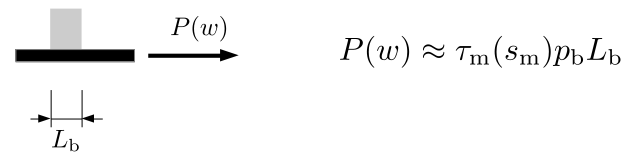

The iterative time-stepping algorithm with increasing load levels can now be displayed for single unknown displacement variable $w$ which must satisfy the equilibrium condition $\bar{P}(t) = P(w)$, where $\bar(P)$ is a prescribed history of loading. A simple implementation of the time stepping procedure exemplifying the solution procedure for a  nonlinear equation is provided for an interested tourist in an Annex notebook [A.2 Newton method](../extras/newton_method.ipynb). 

![image.png](../fig/newton_iteration.png)

In a real simulation of the pull-out problem, the unknown variable is not a slip but the displacement fields $u_\mathrm{m}, u_\mathrm{f}$ are the primary unknowns. They are transformed to corresponding component strains $\varepsilon_\mathrm{m}=u_{\mathrm{m},x}, \varepsilon_\mathrm{f}=u_{\mathrm{f},x}$, and slip $s = u_\mathrm{m} - u_\mathrm{f}$. In the following examples, the component strains are still assumed linear elastic while the bond/shear stress is assumed generally nonlinear. With the known stress fields, the corresponding forces are obtained using numerical integration which deliver the residuum of the global equilibrium condition. The solution scheme described for a single variable in the notebook [A.2](../extras/newton_method.ipynb#newton_iteration_example) remains the same.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/diver.png" alt="Diver" width="40" height="40">
    &nbsp; &nbsp; <b>Deep dive</b> </div>

## Spatial solver - boundary value problem solved using the finite element method  

The identification of the displacements within each equilibrium iteration includes the same conditions that we have applied to derive the analytical solution of the pull-out problem with a constant bond slip law. However, the discrete solution satisfies the equilibrium conditions only approximately in a _week sense_. This means that the local differential equilibrium condition is not satisfied everywhere but only in integration points.

To provide an insight into the way how do the finite-element tools solve the problem, an open implementation of the nonlinear solver used in this and later notebooks is described completely with a running example, plots and animation in a notebook [A.3 Finite element solver for a pull-out problem](../extras/pullout1d.ipynb). This notebook is an Annex to the course and is meant for ambitious adventurers who want to see how the most finite-element programs available on the market are implemented. Detailed explanation of the theoretical background is provided in the Master's courses on linear structural analysis focused on the theoretical background of the finite-element method and on the nonlinear structural analysis.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/binoculars.png" alt="Traveler in a hurry" width="40" height="40">
    &nbsp; &nbsp; <b>Distant view</b> </div>

## Example of the finite-element pull-out simulation

To understand the functionality of the finite-element model implemented in the referenced notebook [A.3](../extras/pullout1d.ipynb), its output is provided here in form of the pull-out curve and of the fields along the bond zone. The applied boundary conditions are given as follows, the free length $L_\mathrm{f}=0$, the matrix is supported at the loaded end.

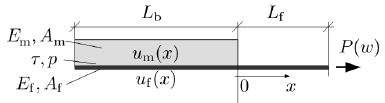

In [1]:
from IPython.display import HTML
html_video_file = open('../extras/pull_out_animation.html','r')
HTML(html_video_file.read())

## What constitutive law can induce such a debonding process?

A closer look at the simulated evolution of the shear stress along the bond zone in the bottom right 
diagram provides an important phenomenological observation. The level of shear increases 
at the right, loaded end in the first stage. After reaching the peak shear stress of $N = 2~\mathrm{N}$ , it 
diminishes slowly to a low value of approximately 0.1 N.

The constitutive law valid at each material point has thus a first ascending and second descending branch. Such kind of behavior is called **softening**. Constitutive behavior exhibiting softening has a severe impact on the structural behavior by introducing the phenomena of strain localization to discrete shear and tensile cracks, accompanied with stress redistribution during the debonding or crack propagation process. The pull-out problem can be conveniently used to visualize the correspondence between the **softening** material law and the structural response with a debonding propagation, as opposed to **hardening** material law.

# **Setting up the model components - new material model**

For the purpose of this comparison, let us introduce a simple piece-wise linear bond-slip law, that can be inserted into the non-linear finite-element code to investigate the effect of the type of nonlinearity on the pull-out response.

<a id="trilinear_material_model"></a>
<div style="background-color:lightgray;text-align:left"> <img src="../icons/work.png" alt="Coding intermezzo" width="40" height="40">
    &nbsp; &nbsp; <b>Coding intermezzo</b> </div>

## Construct a material model with tri-linear bond-slip law  
To indicate how the below examples are implemented let us define a a piece-wise linear function with three branches constituting the bond-slip behavior. It can be used to exemplify how to implement material models in standard non-linear finite-element codes for structural analysis. In codes like `ANSYS, Abaqus, ATENA, Diana`, the spatial integration of the stresses and stiffnesses is based on the so called **predictor**, **corrector** scheme.

This simply means that the material model must provide two functions
 1. the stress evaluation for a given strain increment
 2. the derivative of stress with respect to the strain increment, i.e. the material stiffness.
In our case of a bond-slip law, we need to provide two functions
\begin{align}
 \tau(s) \\
 \frac{\mathrm{d} \tau}{ \mathrm{d} s}
\end{align}.

**Let's import the packages:**

In [2]:
%matplotlib widget
import sympy as sp # symbolic algebra package
import numpy as np # numerical package
import matplotlib.pyplot as plt # plotting package
sp.init_printing() # enable nice formating of the derived expressions

The tri-linear function can be readily constructed using the already known `Piecewise` function provied in `sympy`

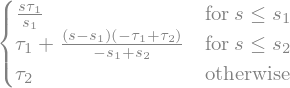

In [3]:
s = sp.symbols('s')
tau_1, s_1, tau_2, s_2 = sp.symbols(r'tau_1, s_1, tau_2, s_2')
tau_s = sp.Piecewise(
    (tau_1 / s_1 * s, s <= s_1), # value, condition
    (tau_1 + (tau_2-tau_1) / (s_2-s_1) * (s - s_1), s <= s_2), # value, condition
    (tau_2, True) # value, otherwise
)
tau_s

The derivative is obtained as

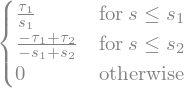

In [4]:
d_tau_s = sp.diff(tau_s, s)
d_tau_s

<div style="background-color:lightgray;text-align:left"> <img src="../icons/evaluate.png" alt="Evaluate" width="40" height="40">
    &nbsp; &nbsp; <b>How to get numbers?</b> </div>

**The above results are symbols! How to transform them to numbers and graphs?**

`sympy` offers the possibility to generate executable code from symbolic expression (`C`, `Fortran`, or `Python`).
To get `Python` functions that accept the characteristic points `tau_1`, `tau_2`, `s_1`, `s_2`
and evaluating the above defined expressions `tau_s` and `d_tau_s`, we need the following two lines:

In [5]:
get_tau_s = sp.lambdify((s, tau_1, tau_2, s_1, s_2), tau_s, 'numpy')
get_d_tau_s = sp.lambdify((s, tau_1, tau_2, s_1, s_2), d_tau_s, 'numpy')

The parameter `numpy` enables us to evaluate both functions for arrays of values, not only for a single number. As a result, an array of slip values can be directly sent to the function `get_tau_s` to obtain an array of corresponding stresses

In [6]:
get_tau_s(np.array([0, 0.5, 1, 1.5, 2]), 1, 0.1, 1, 2)

array([0.  , 0.5 , 1.  , 0.55, 0.1 ])

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Evaluate" width="40" height="40">
    &nbsp; &nbsp; <b>How to to plot it?</b> </div>

Let us now show that the implemented bond-slip function provides a sufficient range of qualitative shapes to demonstrate and discuss the effect of softening and hardening behavior of the interface material. Let us setup a figure `fig` with two axes `ax1` and `ax2` to verify if the defined function is implemented correctly

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), tight_layout=True)
fig.canvas.header_visible = False
s_range = np.linspace(0, 3, 1050)
for tau_2 in [0, 0.5, 1, 1.5, 2]:
    ax1.plot(s_range, get_tau_s(s_range, 1, tau_2, 0.1, 2));
    ax2.plot(s_range, get_d_tau_s(s_range, 1, tau_2, 0.1, 2));
ax1.set_xlabel(r'$s$ [mm]'); ax1.set_ylabel(r'$\tau$ [MPa]');
ax2.set_xlabel(r'$s$ [mm]'); ax2.set_ylabel(r'$\mathrm{d}\tau/\mathrm{d}s$ [MPa/mm]');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Preconfigured pullout model provided in BMCS Tool Suite 
The presented function is the simplest model provided in a general-purpose nonlinear finite-element simulator `BMCS-Tool-Suite`.
The package `bmcs_cross_section` provides several preconfigured models that can be used to analyze and visualize the behavior of a composite cross-section. The analysis of the pullout problem discussed here can be done using the class `PullOutModel1D` that can be imported as follows

In [8]:
from bmcs_cross_section.pullout import PullOutModel1D

An instance of the pullout model can be constructed using the following line

In [9]:
po = PullOutModel1D()

For convenience, let us summarize the model parameters before showing how to assign them to the model instance

**Geometrical variables:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `A_f` | $A_\mathrm{f}$ |  Cross section area modulus of the reinforcement |
| `A_m` | $A_\mathrm{m}$ |  Cross section area modulus of the matrix |
| `P_b` | $p_\mathrm{b}$ |  Perimeter of the reinforcement                  |
| `L_b` | $L_\mathrm{b}$ |  Length of the bond zone of the pulled-out bar   |

**Material parameters of a tri-linear bond law:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `E_f`     | $E_\mathrm{f}$ |  Young's modulus of the reinforcement |
| `E_m`     | $E_\mathrm{m}$ |  Young's modulus of the matrix        |
| `tau_1`    | $\tau_1$      |  bond strength         |
| `tau_2`    | $\tau_2$      |  bond stress at plateu         |
| `s_1`    | $s_1$      |  slip at bond strengh         |
| `s_2`    | $s_1$      |  slip at plateau stress         |

**Fixed support positions:**

| Python | 
| :- |
| `non-loaded end (matrix)` |
| `loaded end (matrix)` |
| `non-loaded end (reinf)` |
| `clamped left` |

Even more conveniently, let us render the interaction window generated by the model to directly see the structure and the naming of the parameters

In [10]:
po.interact()

The tree structure at the top-left frame shows the individual model components. Parameters of each component are shown in the bottom-left frame. By nagivating through tree, the parameter frame and the plotting frame are updated to see the corresponding part of the model. The control bar at the bottom can be used to start, stop and reset the simulation.

**Example interaction:** Develop some confidence into the correctness of the model. Change the stiffness of the components such that they have the same area and stiffness modulus. Run the simulation and watch the profile of the shear flow along the bond length. Increase the bond length, reset the calculation and run it anew. Change the position support and verify the profile of the displacements.

# **Studies 1: Hardening bond-slip law**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551816)&nbsp; part 2

## RILEM Pull-Out Test revisited

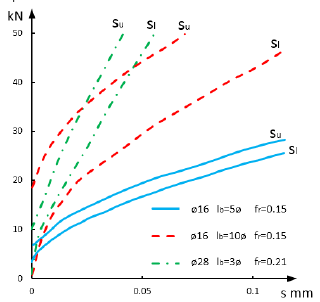

In [11]:
po_rilem = PullOutModel1D(n_e_x=300, w_max=0.12) # n_e_x - number of finite elements along the bond zone
po_rilem.n_e_x=400

Exception occurred in traits notification handler for object: 
t_n: 0, t_n1: 0
U_n[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

To configure the model such that it reflects the RILEM test we can either use the interactive editor above, or assign the 
attributes directly. As apparent from the editor frame above, attributes `fixed_boundary` and `material model` are dropdown boxes offering several options. To assign these parameters we can use the following scheme
 - assign one of the options available in the dropdown box to the attribute `attribute` as a string
 - the option object is then available as an attribute with the name `attribute_` with the trailing underscore.
 Thus, to define a trilinear bond-slip law we can proceed as follows

In [12]:
po_rilem.material_model = 'trilinear' # polymorphis attribute - there are several options to be chosen from
# set the parameters of the above defined tri-linear bond-slip law - add also the matrix and fiber stiffness 
po_rilem.material_model_.E_m=28000 # [MPa]
po_rilem.material_model_.E_f=210000  # [MPa]
po_rilem.material_model_.tau_1=4
po_rilem.material_model_.s_1=1e-3
po_rilem.material_model_.tau_2=8
po_rilem.material_model_.s_2=0.12

Exception occurred in traits notification handler for object: 
t_n: 0, t_n1: 0
U_n[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

To set several parameters of the model component at once, the `trait_set` method can be used as an alternative to one-by-one assignement

In [13]:
d = 16.0 # [mm]
po_rilem.cross_section.trait_set(A_m=100*100, A_f=3.14*(d/2)**2, P_b=3.14*d)
po_rilem.geometry.L_x=5*d
po_rilem.fixed_boundary='loaded end (matrix)'

Exception occurred in traits notification handler for object: 
t_n: 0, t_n1: 0
U_n[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The configured model can be rendered anytime as a web-app to check the input parameters and to adjust them.

In [14]:
po_rilem.run()
po_rilem.interact()

TraitError: The 'time_function' trait of a BCDof instance must be a TimeFunction or None, but a value of <ibvpy.tfunction.loading_scenario.MonotonicLoadingScenario object at 0x7fc7492e14f0> <class 'ibvpy.tfunction.loading_scenario.MonotonicLoadingScenario'> was specified.

## Bond-slip law calibration/validation

**Can we find just one material law that predicts all three tests?** 
 - The preconfigured bond-slip law with an ascending branch after reaching the strength of $\tau_1 = 4$ MPa with the parameters $\tau_1 = 4$ MPa, $\tau_2 = 8$ MPa, $s_1 = 0.001$ mm, $s_1 = 0.12$ mm 
   can reproduce the test with $d = 16$ mm and $L_b = 5d = 80$ mm.
 - To see the prediction for the test with $L_b = 10d = 160$ mm, modify the parameter `geometry.L_x = 160`. The result shows a good match with the experimentally observed response.

**Can we compare the differences in one plot?**

 - The interactive user interface is illustrative and provides a quick orientation in the scope and functionality of the model. Once we have learned its structure, we can use the programming interface to run simulations in a loop and plot them in a single graph to see the similar picture as in the output of the RILEM test above.
 
 - Try to compare the third test with $d = 28$ mm and $L_b = 5d$ mm.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/step_by_step.png" alt="Step by step" width="40" height="40">
    &nbsp; &nbsp; <b>Plot step by step</b> </div>

In [ ]:
fig, (ax, ax_bond_slip) = plt.subplots(1,2, figsize=(8,3), tight_layout=True)
fig.canvas.header_visible = False

print('calculate d=16 mm, L=5d')
d = 16.0 # [mm]
po_rilem.cross_section.trait_set(A_m=100*100, A_f=3.14*(d/2)**2, P_b=3.14*d)
po_rilem.w_max = 0.12
po_rilem.geometry.L_x=5*d
po_rilem.reset() # it is like pressing the reset button in the above window
po_rilem.run() # like pressing the run button
po_rilem.history.plot_Pw(ax, color='blue')

print('calculate d=16 mm, L=10d')
d = 16.0 # [mm]
po_rilem.cross_section.trait_set(A_m=100*100, A_f=3.14*(d/2)**2, P_b=3.14*d)
po_rilem.w_max = 0.12
po_rilem.geometry.L_x=10*d
po_rilem.reset()
po_rilem.run()
po_rilem.hist.plot_Pw(ax, color='red')

print('calculate d=28 mm, L=3d')
d = 16.0 # [mm]
po_rilem.cross_section.trait_set(A_m=100*100, A_f=3.14*(d/2)**2, P_b=3.14*d)
po_rilem.geometry.L_x=3*d
po_rilem.w_max = 0.05
po_rilem.reset()
po_rilem.run()
po_rilem.hist.plot_Pw(ax, color='green')
po_rilem.material_model_.plot(ax_bond_slip)

# The code sequence can be certainly shortened by using the loop. 
# It is deliberately omitted here as the focus is not on programming.

## **Comments** on the study
 - Note that the bond-slip law that can fit all three pull-out tests exhibits hardening. 
 - The maximum control displacement `w_max` is set equal to the one applied in the test as no information beyond this value is provided by the tests.
 - The trilinear bond-slip law does not give us the flexibility to reproduce the pull-out failure
   as it ends with a plateu.
   
## **Need for a more flexible bond-slip law**
 - A more flexibility is provided by a `multilinear` material model for which a list of `s_data` and `tau_data` 
   can be specified.
 - The `multilinear` material model is used in the following code to show how to achieve a pull-out failure by introducing a descending branch in the bond-slip law.
 - Note that for bond-slip laws with descending branch, convergence problems can occur when approaching the pullout failure. The convergence behavior can be improved by refining the spatial discretization given by the number of finite elements along the bond zone `n_e_x` and by the size of the time step
 `time_line.step`.

In [ ]:
fig, (ax, ax_bond_slip) = plt.subplots(1,2, figsize=(8,3), tight_layout=True)
fig.canvas.header_visible = False
d = 32.0 # [mm]
po_rilem.w_max = 0.12
po_rilem.time_line.step = 0.05
po_rilem.material_model='multilinear'
po_rilem.material_model_.trait_set(E_m=28000, E_f=210000, tau_data='0, 4, 6, 0, 0', s_data='0, 1e-3, 0.08, 0.12, 0.2')
po_rilem.geometry.L_x= 1*d
po_rilem.reset()
po_rilem.run()
po_rilem.hist.plot_Pw(ax, color='magenta')
po_rilem.material_model_.plot(ax_bond_slip)

## **Questions:** Effect of bond length on the pullout response - **bond hardening**

 - The iterative trial and error fitting is tedious. **How to design a test from which we can directly obtain the bond-slip law?**
   Comparing the test with $L_b = 5d$ and $L_b = 10d$, we recognize that the shorter bond length resembles more the shape of the bond-slip law. To verify this, set the bond length in the above example to $L_\mathrm{b} = 1d$.
 - On the other hand, if we increase the length, the maximum pull-out will increase. **How can we determine the bond length at which the steel bar will yield?**. A simple and quick answer to this question can be provided by reusing the analytical pull-out model with a constant bond-slip law as a first approximation. The maximum achievable pull-out force of a test with an embedded length $L_\mathrm{b}$ is given as
\begin{align}
\label{EQ:MaxEmbeddedLength}
P_{L} = \bar{\tau} p_\mathrm{b} L_\mathrm{b}
\end{align}
where $p_\mathrm{b}$ denotes the perimeter, equal in all experiments. The force at  which the reinforcement attains the strength $\sigma_{\mathrm{f},\mathrm{mu}}$ and breaks is
\begin{align}
P_{\mathrm{f},\mathrm{mu}}  = \sigma_{\mathrm{f},\mathrm{mu}} A_\mathrm{f}
\end{align}
so that the bond length at which the reinforcement will fail is obtained by requiring $P_L = P_{\mathrm{f},\mathrm{mu}}$ which renders 
\begin{align}
\label{EQ:ConstantBondAnchorageLength}
L_{\mathrm{b}} = \frac{\sigma_{\mathrm{f},\mathrm{mu}} A_\mathrm{f} }
{\bar{\tau} p}.
\end{align}
For a generally nonlinear bond-slip law, we need to evaluate the maximum load numerically. Two examples quantifying the effect of the bond-length for bond-hardening and bond-softening systematically are provided in the notebook [3.2 Anchorage length](3_2_anchorage_length.ipynb)

<a id="cfrp_sheet_test"></a>
# **Studies 2: Softening bond-slip law**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551816)&nbsp; part 3

The presence of the descending branch in a constitutive law is the key for understanding the propagating debonding. Let us use the established framework to study the different phenomenology that occurs for constitutive laws exhibiting softening.  
Consider an interface between a fiber reinforced polymer (FRP) sheet used for retrofitting of RC structure. The study is based on a paper by [Dai et al. (2005)](../papers/dai_frp_pullout_2005.pdf). The goal of the paper is to derive constitutive laws capturing the bond-slip behavior of the adhesive between the FRP sheet and concrete surface. We will use selected experimental pullout curves from the paper to reproduce them using the numerical pullout model introduced above by verifying the bond-slip law derived in the paper.

## Test setup

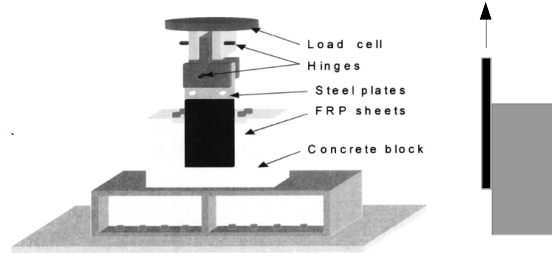

The width of the sheet was $p_b = 100$ mm, the attached bond length is also $L_b = 100$ mm.
The properties of the tested sheets are summarized in the table. The dimensions of the concrete block were $200 \times 400 \times 200$ mm.

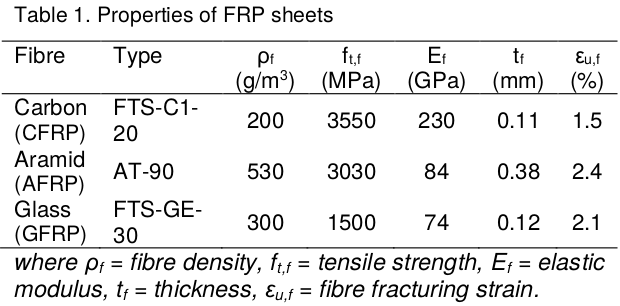

The pull-out curves measured for different adhesives used to realize the bond to the matrix were evaluated as the strain in the FRP sheet at the loaded end versus slip displacement. 

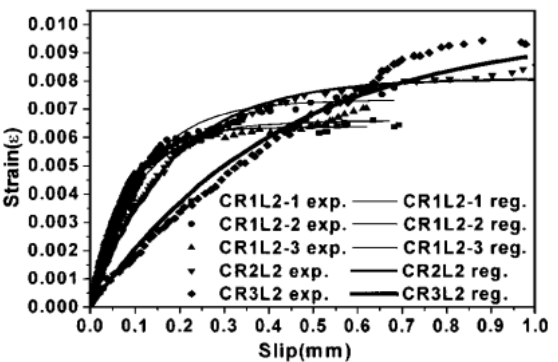

To compare with our studies, we can transfer the results to pullout force $P$ by evaluating
\begin{align}
P = p_\mathrm{b} t_\mathrm{f} E_\mathrm{f} \varepsilon_\mathrm{f}
\end{align}
yielding for the strain 0.010

In [ ]:
p_b = 100 # [mm]
t_f = 0.11 # [mm]
E_f = 230000 # [MPa]
eps_f_max = 0.01 # [-]
P_max = p_b * t_f * E_f * eps_f_max / 1000 # [kN]
P_max # [kN]

The bond-slip law reported by the authors of the paper has the following shape
<a id="cfrp_bond_slip"></a>

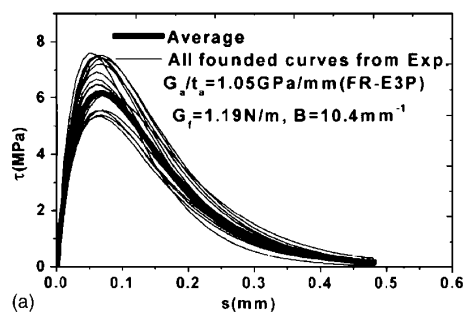

## Model for CFRP pullout test 

Let us construct another pullout model named `po_cfrp` with a bond slip law exhibiting strong softening. Such kind of behavior is observed in tests between FRP sheets and concrete. An example of such an experimental study 
<a id="cfrp_trilinear_bond"></a>

In [ ]:
po_cfrp = PullOutModel1D(n_e_x=300, w_max=1.5) # mm 
po_cfrp.geometry.L_x=100 # mm
po_cfrp.time_line.step = 0.02
po_cfrp.cross_section.trait_set(A_m=400*200, A_f=100*0.11, P_b=100)
po_cfrp.material_model='trilinear'
po_cfrp.material_model_.trait_set(E_m=28000, E_f=230000, tau_1=5.5, tau_2=0, s_1=0.08, s_2=0.4)
po_cfrp.interact()

## **Conclusions:** to interactive study of CFRP sheet debonding
 - The bond-slip law reported in the paper can reproduce well the pullout response measured in the test.
 - The study of the debonding process shows that the adhesive is only active within an effective length of approximately 40-50 mm.
 - As a consequence, in contrast to steel rebar studied above, the maximum pullout load cannot be increased by an increasing bond length.
 - In the studied case there will FRP rupture is not possible because its strength is larger than $P_\max$ of 25 kN. To verify this, we use the strength of 3550 MPa given in the above table and multiply with the cross-sectional area of the sheet, i.e. $f_t t_f p_b$ to obtain

In [ ]:
f_t = 3550 # CFRP sheet strength in [MPa] - see the table above
f_t * t_f * p_b / 1000 # breaking force of the sheet 100 x 100 mm in [kN]

## **Question:** Effect of bond length on the pullout response - **bond softening**
 - Similarly to the the example with bond hardening above, we ask the question what happens with the pullout curve if we reduce the bond length to a minimum. The answer is the same - we will recover a bond-slip law multiplied by the bond area.
 - However, if we increase the bond length, the trend will be different as already mentioned above. Once the length exceeds the effective bond length, there will be no increase in the pullout force and the pullout curve will exhibit a plateau. Let us show this trend by running a simple parametric study. Instead of doing it step by step we now run a loop over the list of length and colors, change the parameter `geometry.L_x` within the loop, `reset`, `run`, and `plot` the pullout curve in a respective color.  

<div style="background-color:lightgray;text-align:left"> <img src="../icons/run.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>Run in a loop to see the effect of bond length</b> </div>

Note that a list in python is defined by the brackets
```[1,2,3,4]```. Two lists can be "zipped" together so that we can run
a loop over the lengths and colors as shown in the third line of the cell
<a id="crfp_study"></a>

In [ ]:
fig, (ax, ax_bond_slip) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
fig.canvas.header_visible = False
for L, color in zip([5, 10, 50, 100, 200], ['red','green','blue','black','orange']):
    print('evaluating pullout curve for L', L)
    po_cfrp.geometry.L_x=L
    po_cfrp.reset()
    po_cfrp.run()
    po_cfrp.history.plot_Pw(ax, color=color)
po_cfrp.material_model_.plot(ax_bond_slip)

# **Remark to structural ductility:** how to make the plateau useful?

The softening bond cannot exploit the full strength of the CFRP sheet which might seem uneconomic at first sight. On the other hand it can be viewed as a mechanism that increases the deformation capacity of the structure with a constant level of load. This property can be effectively used to enhance the ductility of the structure, i.e. induce large deformation before the structural collapse required in engineering designs. This documents the importance of knowledge of the stress redistribution mechanisms available in the material. In steel reinforced structure, the ductility is provided inherently by the steel yielding property. In In case of brittle reinforcement, e.g. carbon fabrics, CFRP sheets, glass fabrics, other sources of ductility must be provided to ensure the sufficient deformation capacity between the serviceability and ultimate limit states.  

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <a href="../exercises/X0301 - Pull-out curve versus shear stress profiles.pdf"><b>Exercise X0301:</b></a> <b>Pull-out curve versus shear stress profiles - part 1</b>  
<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551821"><img src="../icons/bmcs_video.png" alt="Run"></a>
</div>

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <a href="../exercises/X0302 - Pull-out curve versus shear stress profiles.pdf"><b>Exercise X0302:</b></a> <b>Pull-out curve versus shear stress profiles - part 2</b> 
<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551823"><img src="../icons/bmcs_video.png" alt="Run"></a>
</div>

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour2_constant_bond/fragmentation.ipynb#top">2.3 Tensile behavior of composite</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="3_2_anchorage_length.ipynb#top">3.2 Pullout curve versus bond length</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 